# 相关性分析
## 四种基本变量
1. 定类变量
2. 定序变量
3. 定距变量：不具有0点
4. 定比变量：具有0点
## 两变量的相关性分析
### Pearson相关系数
适用于定距、定比类型的变量\
检验用t统计量(防止出现偶然性)，t服从自由度(n-2)的分布\
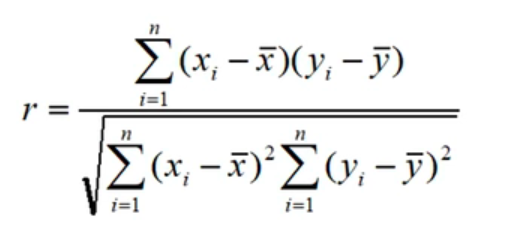
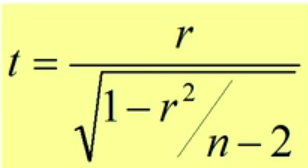
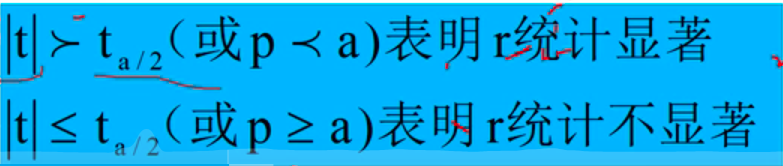
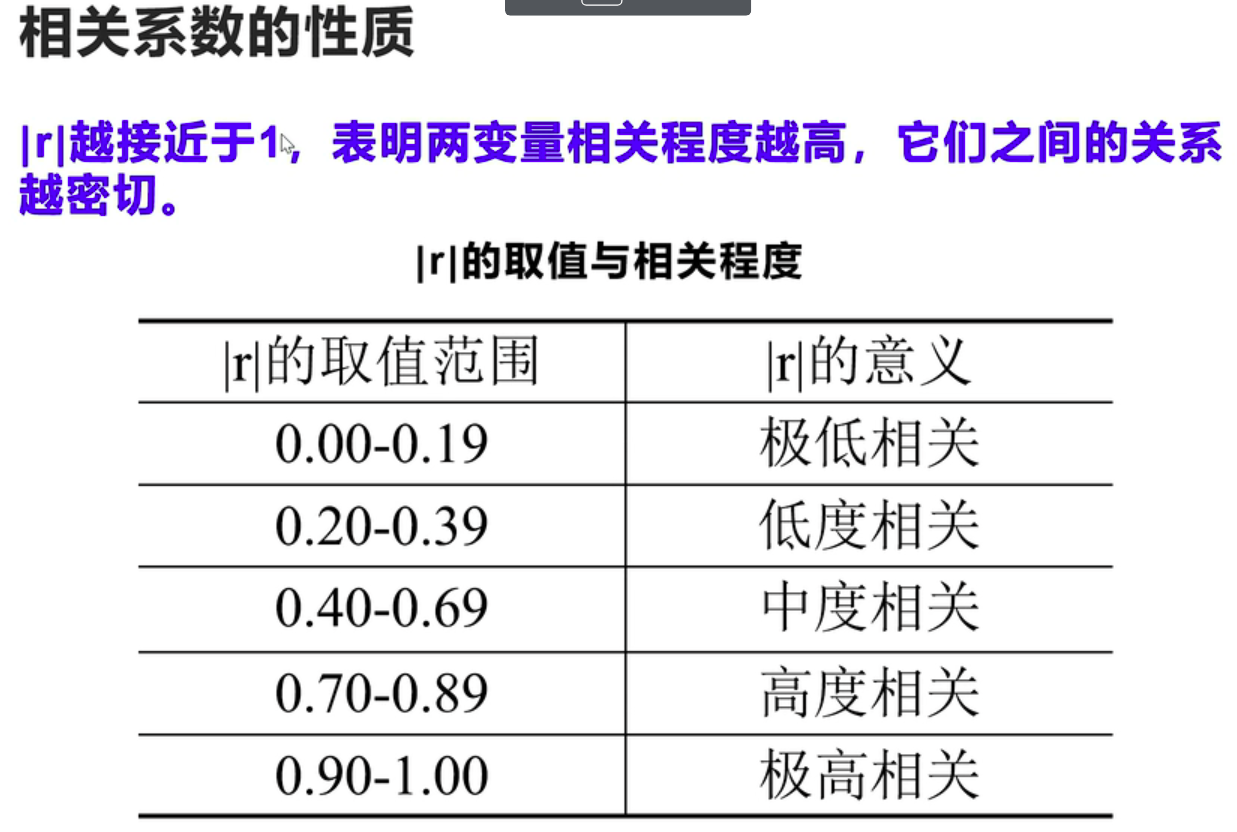
#### 适用条件
1. 连续变量
2. 两变量正态分布(怀特检验)
3. 两变量是成对的数据
4. 两变量是线性关系(拟合一个曲线)
### Spearman等级相关系数
适用于定序变量\
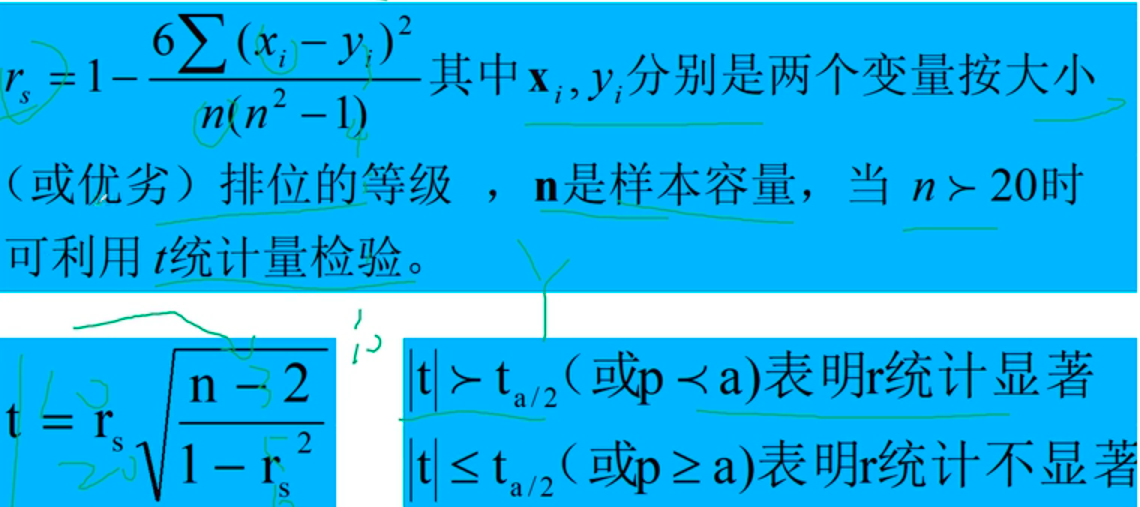
### Kendall tua-b等级相关系数
适用于定序变量
## 相关性判断指标
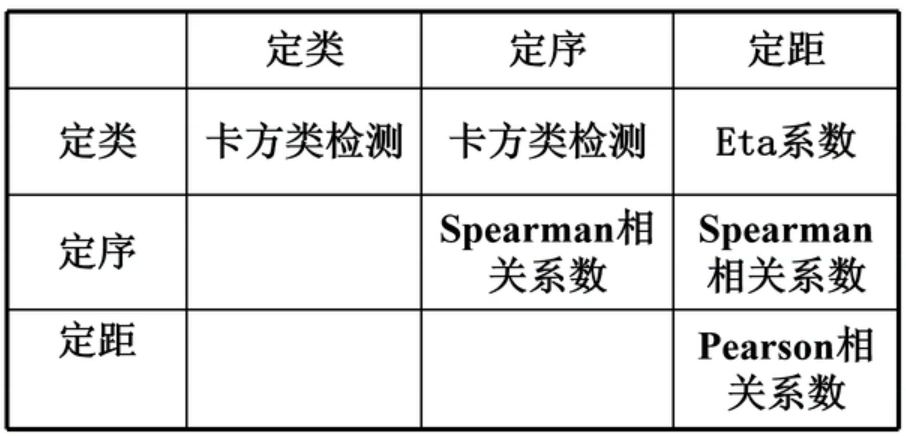


In [5]:
# 卡方检验
from  scipy.stats import chi2_contingency
import numpy as np
kf_data = np.array([[15,5], [3,17]])
kf = chi2_contingency(kf_data)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=12.2222, p-value=0.0005, df=1 expected_frep=[[ 9. 11.]
 [ 9. 11.]]


In [12]:
#导入依赖库
import numpy as np
import pandas as pd
from scipy import stats
data = pd.DataFrame({'A':[2,3,4,3,4,5,6,7.5,3.3,2.5,6.8], 
                     'B':[46,42,41,43,39,38,33.2,20.6,41.3,51.5,28],})
# 执行t检验
t_statistic, p_value = stats.ttest_ind(data['A'], data['B'])
if p_value<0.05:
    print("r统计显著")
else:
    print("r统计不显著")
print("\nT统计量:", t_statistic)
print("P值:", p_value)
print(data.corr())   # 计算pearson相关系数
print(data.corr('kendall'))      # Kendall Tau相关系数
print(data.corr('spearman'))     # spearman秩相关


r统计显著

T统计量: -12.987005958077143
P值: 3.3225175301270525e-11
          A         B
A  1.000000 -0.951139
B -0.951139  1.000000
          A         B
A  1.000000 -0.944606
B -0.944606  1.000000
          A         B
A  1.000000 -0.986312
B -0.986312  1.000000


In [13]:
# eta
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 创建一个示例数据集，其中包含一个定类变量和一个定距变量
df = pd.DataFrame({
    'Category': ['1','1','1','1','1','1','2','2','2','2','2','2'],
    'Value': [82,83,84,95,75,76,90,78,75,68,69,70]
})
df


,Category,Value
0,1,82
1,1,83
2,1,84
3,1,95
4,1,75
5,1,76
6,2,90
7,2,78
8,2,75
9,2,68


In [14]:
# eta：定类与定距
# 执行方差分析（ANOVA）
model = ols('Value ~ Category', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# 计算eta squared
ss_between = anova_table['sum_sq'][0]
ss_total = anova_table['sum_sq'].sum()
eta_squared = ss_between / ss_total

print(f"Eta squared: {eta_squared:.2f}")
# eta平方小于0.06时，表明变量之间的相关程度比较微弱，这种程度只存在统计显著的意义，而缺乏实际应用价值；eta平方大于0.06，小于0.16时，表明变量之间有中度的相关关系；当eta平方大于0.16时，表明变量之间存在强相关


Eta squared: 0.22


In [17]:
# Phi 二元分类之间
import pandas as pd
from scipy.stats import chi2_contingency

# 创建一个包含两个二元变量的示例数据集
data = {
    'Variable1': ['1','1','1','1','1','2','2','2','2','2','2','2'],
    'Variable2': [9,5,7,8,13,15,22,30,15,18,15,9]
}

df = pd.DataFrame(data)

# 创建列联表
contingency_table = pd.crosstab(df['Variable1'], df['Variable2'])

# 执行卡方独立性检验
chi2, p, _, _ = chi2_contingency(contingency_table)

# 计算Phi系数
n = contingency_table.values.sum()
phi = (chi2 / n) ** 0.5

print(f"Phi coefficient: {phi:.3f}")


Phi coefficient: 0.910


In [18]:
# 克莱姆，分类之间
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# 创建一个包含两个分类变量的示例数据集
data = {
  'Variable1': ['1','1','1','1','1','2','2','2','2','2','2','2'],
    'Variable2': [9,5,7,8,13,15,22,30,15,18,15,9]
}

df = pd.DataFrame(data)

# 创建列联表
contingency_table = pd.crosstab(df['Variable1'], df['Variable2'])

# 执行卡方独立性检验
chi2, _, _, _ = chi2_contingency(contingency_table)

# 计算克莱姆V
n = contingency_table.values.sum()
k = contingency_table.shape[0]
r = contingency_table.shape[1]
cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print(f"Cramer's V: {cramer_v:.3f}")


Cramer's V: 0.910
